In [4]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:

user = 'admin'
password = 'isba4715'
host = 'isba-dev-01.cjwugys6yj0u.us-east-1.rds.amazonaws.com'
port_number = '3306'
database_name = 'HPolProject'
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port_number}/{database_name}')


tnam = 'MajorEligibilityGroupYr'


medf = pd.read_sql(tnam, engine)

medf

,state,year,majoreligibilitygroup,counteverenrolled,countlastmonthenrollment,averageenrollmentpermonth,dqunusable
0,Alabama,2016,Children,"775,707","764,943","636,492",
1,Alabama,2016,Adult expansion group,0,0,0,
2,Alabama,2016,Adult,"229,568","224,581","171,306",
3,Alabama,2016,Aged,"125,142","125,142","112,385",
4,Alabama,2016,Persons with disabilities,"239,639","232,209","215,413",
...,...,...,...,...,...,...,...
2592,Virgin Islands,2022,Adult,"7,439","7,148","6,521",Not assessed
2593,Virgin Islands,2022,Aged,"4,665","4,664","4,260",Not assessed
2594,Virgin Islands,2022,Persons with disabilities,573,519,519,Not assessed
2595,Virgin Islands,2022,COVID newly-eligible,23,20,DS,Not assessed


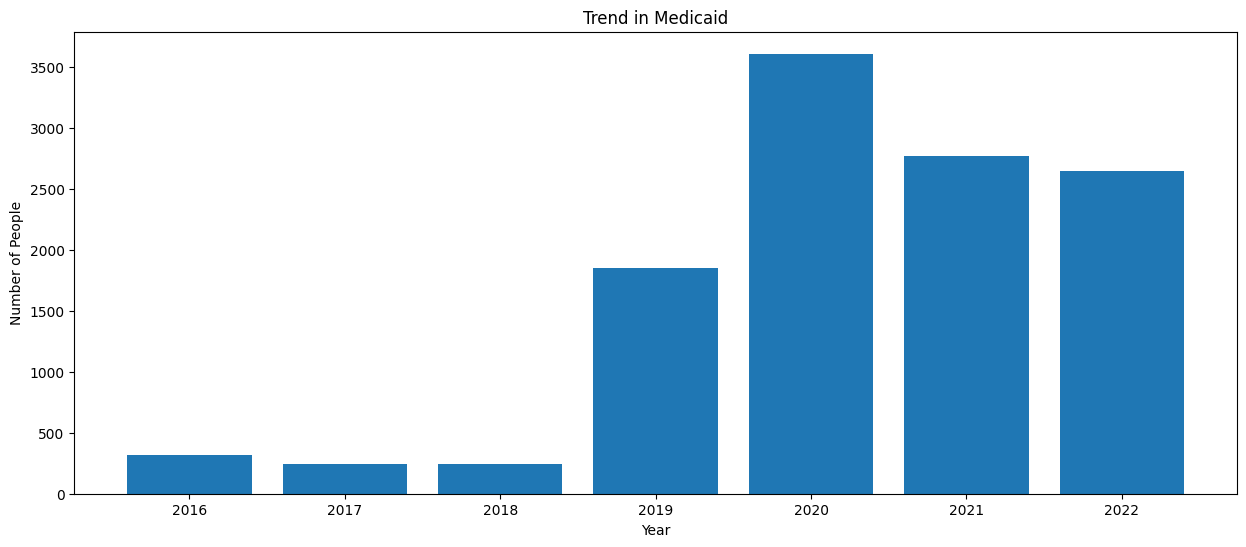

In [6]:
#visualization to see the trend in people enrolling in medicaid over the years
medf['counteverenrolled'] = pd.to_numeric(medf['counteverenrolled'], errors='coerce')
groupdf = medf.groupby('year')['counteverenrolled'].sum().reset_index()
plt.figure(figsize=(15, 6))
plt.bar(groupdf['year'], groupdf['counteverenrolled'])
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Trend in Medicaid')
plt.show()

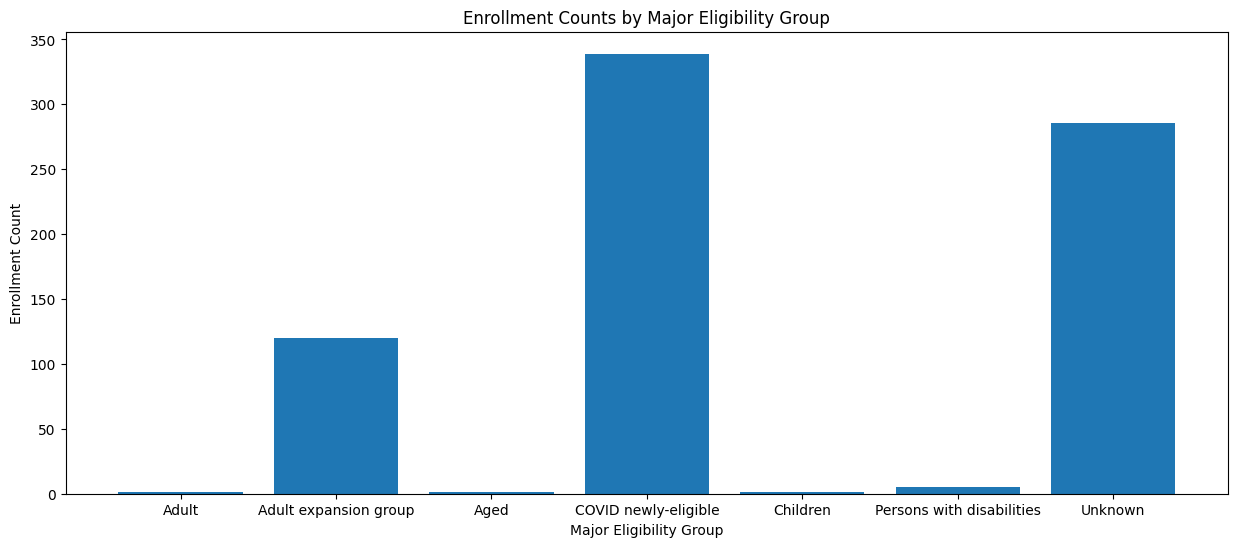

In [7]:
#visualization to see how many people are enrolled, also to make sure that the numbers are integers since originally they are a string
medf['counteverenrolled'] = pd.to_numeric(medf['counteverenrolled'], errors='coerce')

#grouping by major eligibility group
groupdf = medf.groupby('majoreligibilitygroup')['counteverenrolled'].count().reset_index()

#make the bar plot
plt.figure(figsize=(15, 6))
plt.bar(groupdf['majoreligibilitygroup'], groupdf['counteverenrolled'])
plt.xlabel('Major Eligibility Group')
plt.ylabel('Enrollment Count')
plt.title('Enrollment Counts by Major Eligibility Group')
plt.show()



In [32]:

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port_number}/{database_name}')


tnam2 = 'FullDualEligibility'


fdf = pd.read_sql(tnam2, engine)

fdf

,state,month,dualstatus,countenrolled,dqunusable
0,Alabama,201601,Full dual eligibility,"93,611",
1,Alabama,201602,Full dual eligibility,"93,259",
2,Alabama,201603,Full dual eligibility,"92,894",
3,Alabama,201604,Full dual eligibility,"92,386",
4,Alabama,201605,Full dual eligibility,"92,018",
...,...,...,...,...,...
3329,Rhode Island,202006,Full dual eligibility,"42,490",
3330,Rhode Island,202007,Full dual eligibility,"42,565",
3331,Rhode Island,202008,Full dual eligibility,"42,736",
3332,Rhode Island,202009,Full dual eligibility,"42,891",


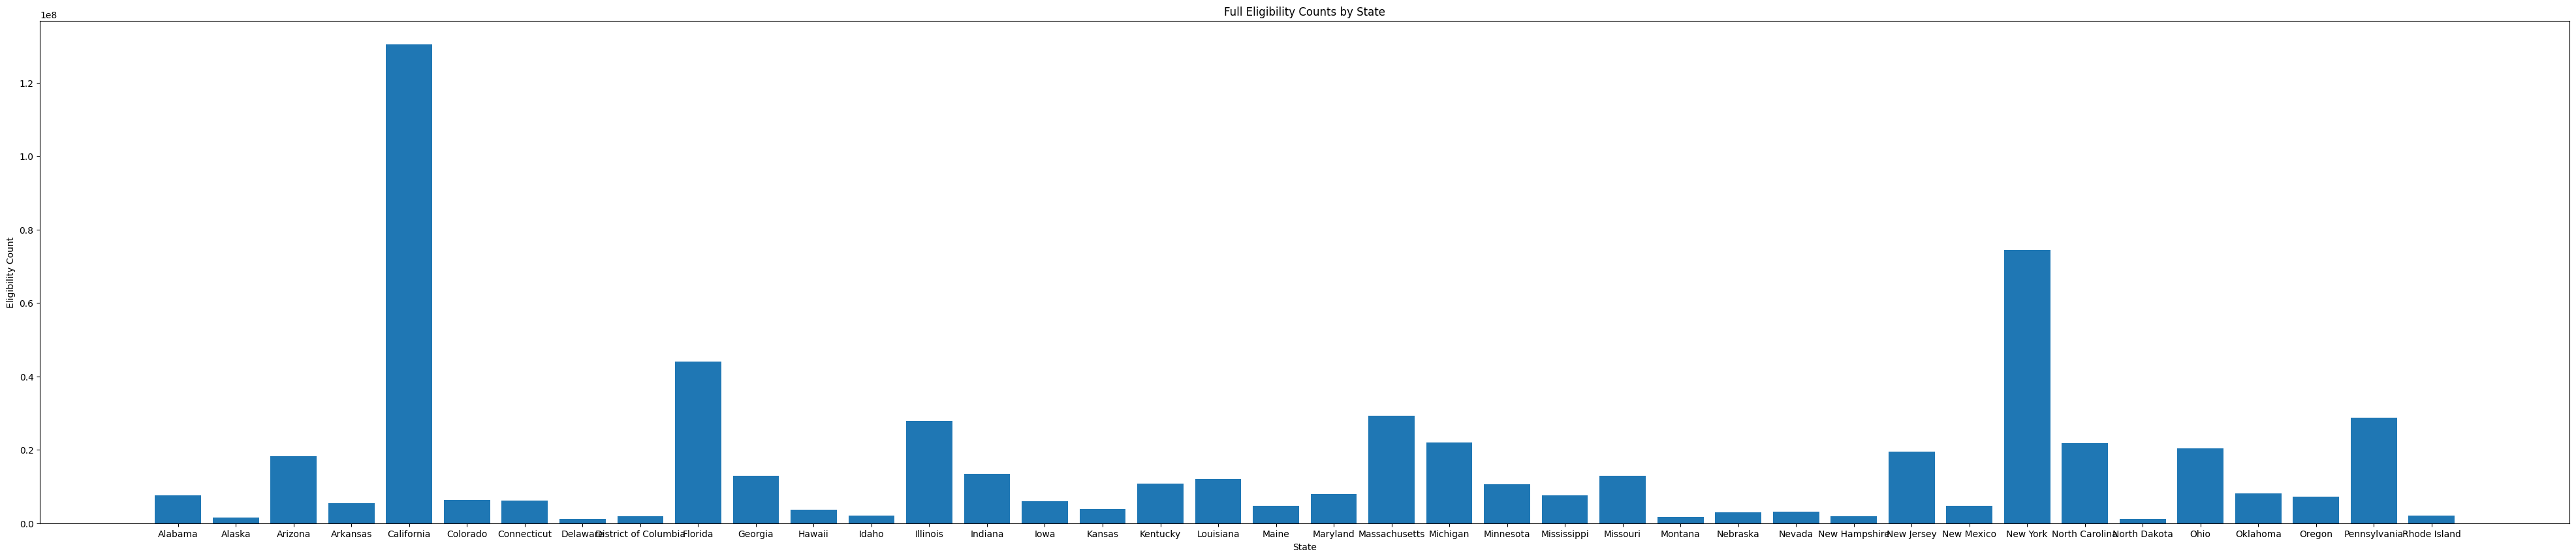

        state  countenrolled
0     Alabama        7596391
1      Alaska        1638339
2     Arizona       18224459
3    Arkansas        5471383
4  California      130404833


In [78]:

fdf['countenrolled'] = pd.to_numeric(fdf['countenrolled'], errors='coerce')
gf = fdf.groupby('state')['countenrolled'].sum().reset_index()

plt.figure(figsize=(50, 10))
plt.bar(gf['state'], gf['countenrolled'])
plt.xlabel('State')
plt.ylabel('Eligibility Count')
plt.title('Full Eligibility Counts by State')
plt.show()

print(gf.head())

In [58]:
tnam3 = 'PartialDualEligibility'


prtf = pd.read_sql(tnam3, engine)
prtf

,state,month,dualstatus,countenrolled,dqunusable
0,Alabama,201601,Partial dual eligibility,"123,185",
1,Alabama,201602,Partial dual eligibility,"123,224",
2,Alabama,201603,Partial dual eligibility,"123,430",
3,Alabama,201604,Partial dual eligibility,"123,652",
4,Alabama,201605,Partial dual eligibility,"123,728",
...,...,...,...,...,...
3328,Rhode Island,202005,Partial dual eligibility,"7,519",
3329,Rhode Island,202006,Partial dual eligibility,"7,497",
3330,Rhode Island,202007,Partial dual eligibility,"7,499",
3331,Rhode Island,202008,Partial dual eligibility,"7,467",


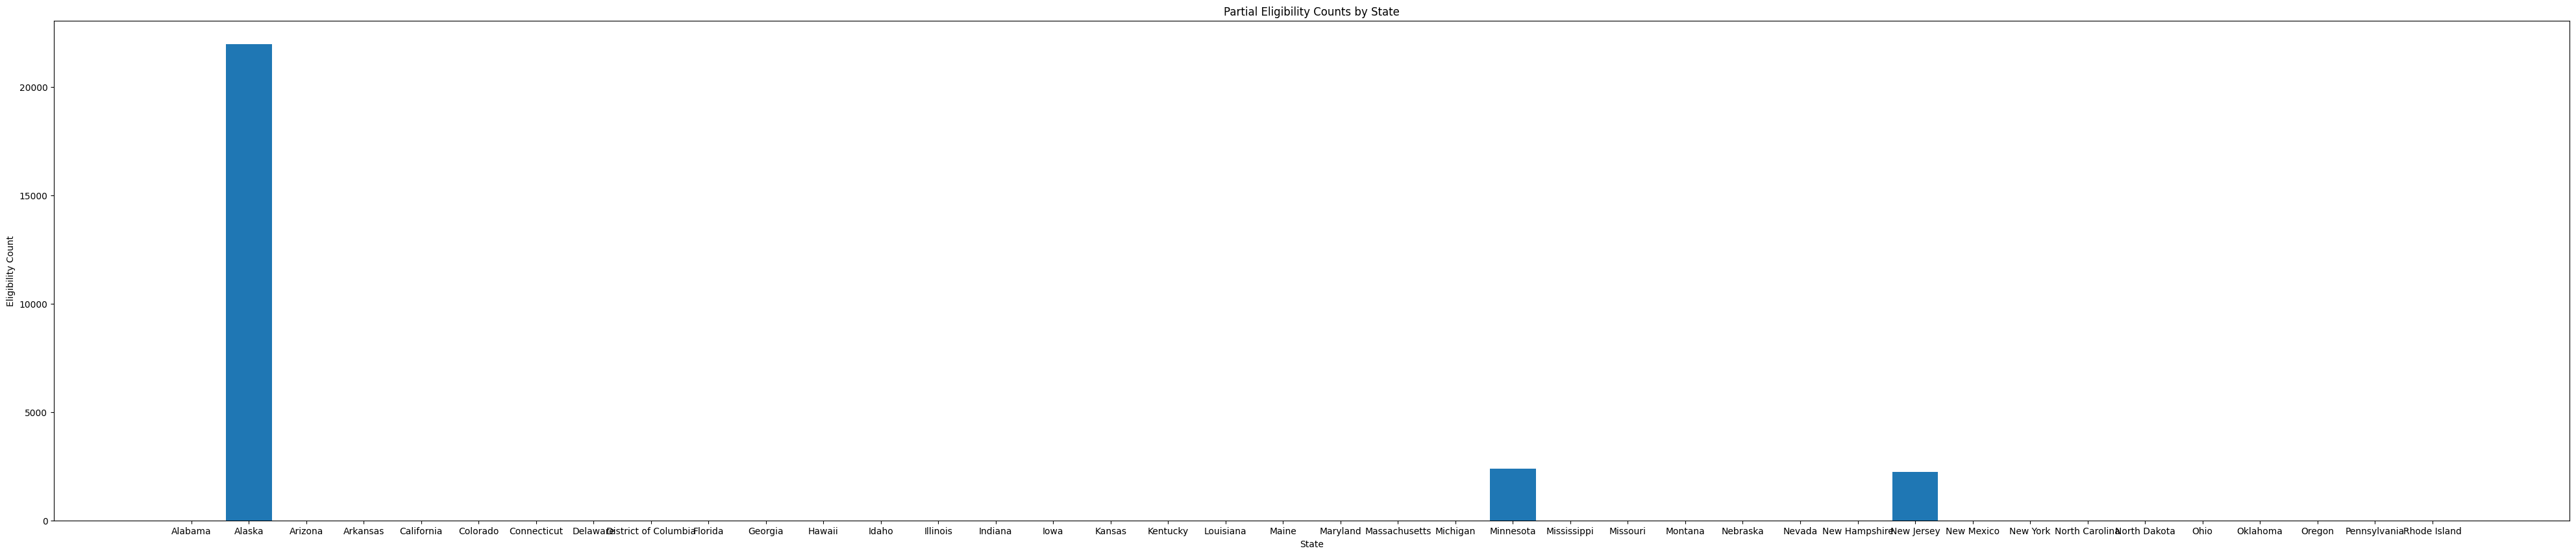

In [59]:
prtf['countenrolled'] = pd.to_numeric(prtf['countenrolled'], errors='coerce')
grf = prtf.groupby('state')['countenrolled'].sum().reset_index()

plt.figure(figsize=(50, 10))
plt.bar(grf['state'], grf['countenrolled'])
plt.xlabel('State')
plt.ylabel('Eligibility Count')
plt.title('Partial Eligibility Counts by State')
plt.show()

#there isn't a lot of people partially dually eligible except for Alaska

In [74]:
tnam4 = 'NotDuallyEligible'


ndf = pd.read_sql(tnam4, engine)
ndf

,state,month,dualstatus,countenrolled,dqunusable
0,Alabama,201601,Not dually eligible,"920,630",
1,Alabama,201602,Not dually eligible,"920,173",
2,Alabama,201603,Not dually eligible,"921,584",
3,Alabama,201604,Not dually eligible,"921,008",
4,Alabama,201605,Not dually eligible,"919,230",
...,...,...,...,...,...
3328,Rhode Island,202005,Not dually eligible,"284,856",
3329,Rhode Island,202006,Not dually eligible,"287,925",
3330,Rhode Island,202007,Not dually eligible,"290,927",
3331,Rhode Island,202008,Not dually eligible,"293,947",


In [ ]:
ndf

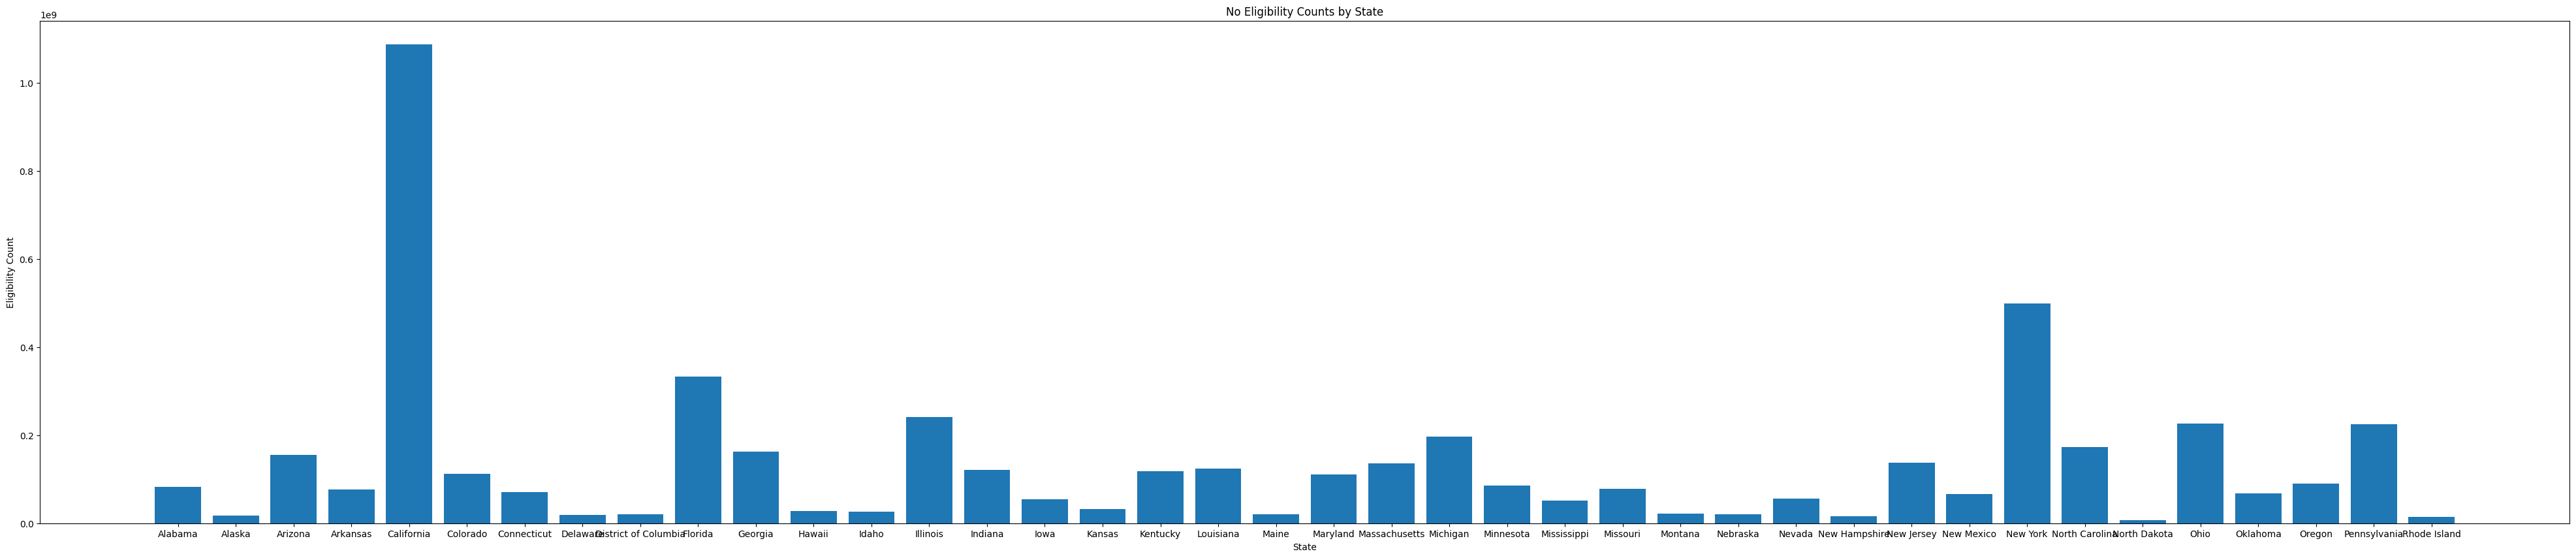

        state  countenrolled
0     Alabama       83284883
1      Alaska       17257169
2     Arizona      155050409
3    Arkansas       76043990
4  California     1086628839


In [77]:
ndf['countenrolled'] = ndf['countenrolled'].astype(str)
ndf['countenrolled'] = pd.to_numeric(ndf['countenrolled'], errors='coerce')
grft = ndf.groupby('state')['countenrolled'].sum().reset_index()

plt.figure(figsize=(50, 10))
plt.bar(grft['state'], grft['countenrolled'])
plt.xlabel('State')
plt.ylabel('Eligibility Count')
plt.title('No Eligibility Counts by State')
plt.show()

print(grft.head())
#Similarly to fully dually eligible there are a lot of not dually eligible